In [46]:
# Step 1: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [48]:
# Step 2: Generate Synthetic Data
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 2 - 1, axis=0)  # Values in range [-1, 1]
y = X**3 - X**2 + 0.5 * X + 0.3 + 0.1 * np.random.randn(100, 1)

In [50]:
# Step 3: Polynomial Features
poly = PolynomialFeatures(degree=15)
X_poly = poly.fit_transform(X)

In [52]:
# Step 4: Train-Test Split
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [32]:
alphas = np.logspace(-6, 2, 200)
coefs = []

In [54]:
# Step 5: Ridge Coefficient Path Visualizer
alphas = np.logspace(-6, 2, 200)
coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_poly, y_train)
    coefs.append(ridge.coef_.flatten())

coefs = np.array(coefs)

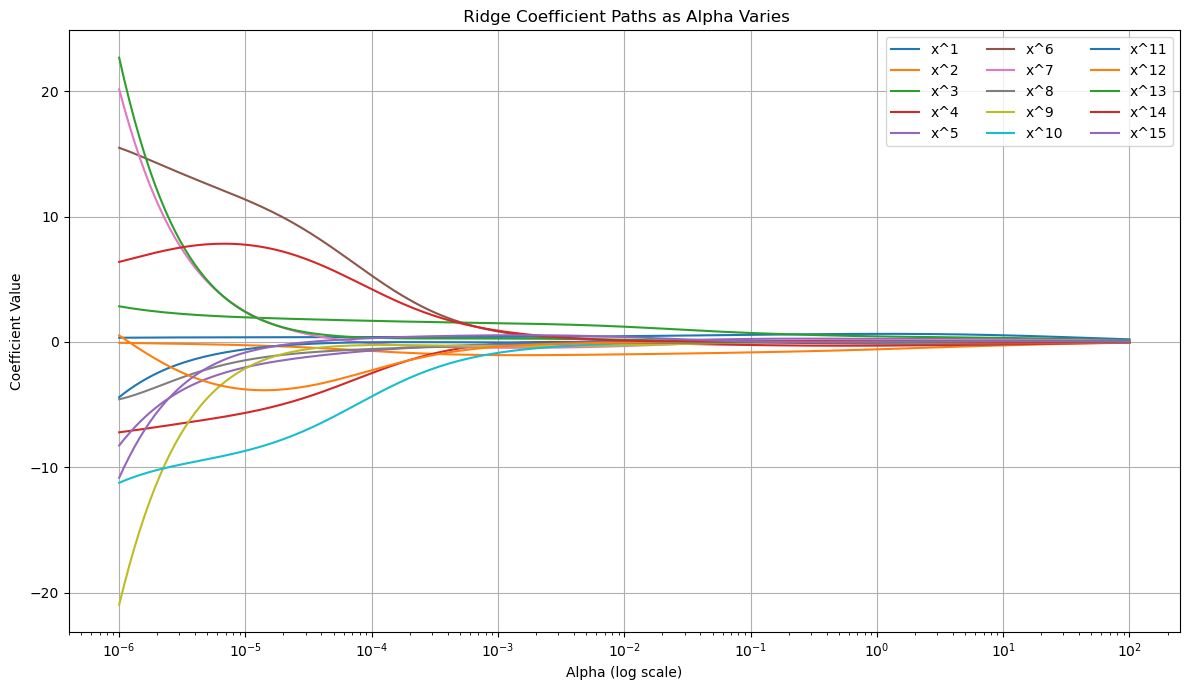

In [56]:
# Step 6: Plot Coefficient Paths
plt.figure(figsize=(12, 7))
for i in range(1, coefs.shape[1]):  # Skip bias term
    plt.plot(alphas, coefs[:, i], label=f'x^{i}')

plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coefficient Value')
plt.title(' Ridge Coefficient Paths as Alpha Varies')
plt.legend(loc='best', ncol=3)
plt.grid(True)
plt.tight_layout()
plt.show()